In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load SDOH - 2020 Dataset with Full Features

In [2]:
df = pd.read_excel('/content/MERGED_SDOH_PLUS_BED UTIL RATIO.xlsx')
df.head()

,COUNTYFIPS,STATE,COUNTY,REGION,ACS_TOT_POP_POV_sum,ACS_AVG_HH_SIZE_avg,ACS_PCT_DISABLE_avg,ACS_PCT_ENGL_NOT_ALL_avg,ACS_PCT_AGE_ABOVE65_avg,ACS_PCT_HH_INTERNET_avg,...,ACS_PCT_UNINSURED_BELOW64_avg,CEN_AREALAND_SQM_TRACT_avg,CEN_POPDENSITY_TRACT_avg,WUSTL_AVG_PM25_avg,POS_DIST_ED_TRACT_avg,POS_DIST_MEDSURG_ICU_TRACT_avg,POS_DIST_TRAUMA_TRACT_avg,POS_DIST_CLINIC_TRACT_avg,BED_UTIL_RATIO,IS_METRO_MICRO
0,1001,Alabama,Autauga County,South,55181.0,2.647058,17.470588,0.000000,15.352941,82.352941,...,9.411764,34.941176,937.529411,7.176470,5.294117,5.352941,14.705882,9.000000,0.378106,1.0
1,1003,Alabama,Baldwin County,South,215170.0,2.454545,13.977272,0.068181,21.681818,83.204545,...,12.159090,36.090909,506.772727,8.227272,6.409090,7.500000,25.068181,8.181818,0.504948,1.0
2,1005,Alabama,Barbour County,South,22070.0,2.222222,19.111111,0.333333,19.777777,65.000000,...,12.888888,98.333333,130.666666,7.000000,8.666666,8.666666,41.222222,2.222222,0.284690,1.0
3,1007,Alabama,Bibb County,South,20748.0,3.125000,18.000000,0.000000,16.250000,74.875000,...,10.750000,77.875000,76.125000,6.625000,8.500000,21.250000,27.000000,4.375000,0.286999,1.0
4,1009,Alabama,Blount County,South,57127.0,2.687500,15.000000,0.312500,18.500000,80.187500,...,13.187500,40.312500,112.187500,7.000000,9.625000,9.750000,27.250000,4.125000,0.304907,1.0


# Explore Dataset before Feature Selection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COUNTYFIPS                        3239 non-null   int64  
 1   STATE                             3239 non-null   object 
 2   COUNTY                            3234 non-null   object 
 3   REGION                            3143 non-null   object 
 4   ACS_TOT_POP_POV_sum               3234 non-null   float64
 5   ACS_AVG_HH_SIZE_avg               3234 non-null   float64
 6   ACS_PCT_DISABLE_avg               3234 non-null   float64
 7   ACS_PCT_ENGL_NOT_ALL_avg          3234 non-null   float64
 8   ACS_PCT_AGE_ABOVE65_avg           3234 non-null   float64
 9   ACS_PCT_HH_INTERNET_avg           3234 non-null   float64
 10  ACS_PCT_CHILD_1FAM_avg            3234 non-null   float64
 11  ACS_MEDIAN_HH_INC_sum             3234 non-null   float64
 12  ACS_PC

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COUNTYFIPS,3239.0,31504.662550,16462.990939,1001.000000,19032.000000,30033.000000,46126.000000,7.803000e+04
ACS_TOT_POP_POV_sum,3234.0,98504.677798,322472.553341,0.000000,9612.250000,23553.000000,63324.000000,9.884138e+06
ACS_AVG_HH_SIZE_avg,3234.0,2.368952,0.548788,0.000000,2.107777,2.402154,2.666666,5.000000e+00
ACS_PCT_DISABLE_avg,3234.0,15.578153,5.201365,0.000000,12.625893,15.333333,18.600000,4.800000e+01
ACS_PCT_ENGL_NOT_ALL_avg,3234.0,0.430450,1.133230,0.000000,0.000000,0.062500,0.375000,2.200000e+01
ACS_PCT_AGE_ABOVE65_avg,3234.0,18.824671,5.719314,0.000000,16.000000,18.818181,21.666666,4.985714e+01
ACS_PCT_HH_INTERNET_avg,3234.0,75.692203,15.459853,0.000000,72.762500,79.000000,83.500000,9.700000e+01
ACS_PCT_CHILD_1FAM_avg,3234.0,28.569577,11.430103,0.000000,22.112857,28.160256,34.526900,9.700000e+01
ACS_MEDIAN_HH_INC_sum,3234.0,53803.784787,17732.176889,0.000000,44620.500000,52881.500000,61834.750000,1.485230e+05
ACS_PCT_HH_INC_10000_avg,3234.0,6.583173,3.564438,0.000000,4.250000,6.000000,8.166666,2.850000e+01


In [5]:
df.isna().sum()

,0
COUNTYFIPS,0
STATE,0
COUNTY,5
REGION,96
ACS_TOT_POP_POV_sum,5
ACS_AVG_HH_SIZE_avg,5
ACS_PCT_DISABLE_avg,5
ACS_PCT_ENGL_NOT_ALL_avg,5
ACS_PCT_AGE_ABOVE65_avg,5
ACS_PCT_HH_INTERNET_avg,5


In [6]:
# Display structure and summary
print(df.shape)
print(df.dtypes.value_counts())

(3239, 45)
float64    41
object      3
int64       1
Name: count, dtype: int64


# Identify features that are correlated with BED_UTIL_RATIO

Feature Selection - Identify Top 20 features correlates with Bed Hospitalization Utility

Correlation Matrix

In [7]:
# Identify numeric features
df_corr = df.select_dtypes(include=['int', 'float']).corr()

# Compute absolute correlation with target
correlation_with_target = df_corr['BED_UTIL_RATIO'].abs().sort_values(ascending=False)

# Convert to DataFrame for table display
correlation_table = pd.DataFrame({
    'Feature': correlation_with_target.index,
    'Absolute Correlation': correlation_with_target.values
})

# Display top 20 correlated features in table format
print(correlation_table.head(20).to_string(index=False))

# Select top 20 most correlated predictors (including BED_UTIL_RATIO)
top_20_corr_features = correlation_table['Feature'][:20].tolist()

# Add categorical/geographic identifiers
selected_features = ['COUNTYFIPS', 'STATE', 'REGION'] + top_20_corr_features

# Confirm final feature count
print(f"\nTotal selected features: {len(selected_features)}")
print("Selected features:", selected_features)

                         Feature  Absolute Correlation
                  BED_UTIL_RATIO              1.000000
                  IS_METRO_MICRO              0.404766
           ACS_PCT_RENTER_HU_avg              0.286737
  POS_DIST_MEDSURG_ICU_TRACT_avg              0.278767
ACS_PCT_RENTER_HU_COST_50PCT_avg              0.248769
ACS_PCT_RENTER_HU_COST_30PCT_avg              0.246322
             ACS_TOT_POP_POV_sum              0.243171
 ACS_PCT_OWNER_HU_COST_30PCT_avg              0.231916
        CEN_POPDENSITY_TRACT_avg              0.224611
      CEN_AREALAND_SQM_TRACT_avg              0.221157
           ACS_MEDIAN_HH_INC_sum              0.197687
    ACS_PCT_HH_ALONE_ABOVE65_avg              0.195666
         ACS_PCT_AGE_ABOVE65_avg              0.188541
           ACS_PCT_HU_NO_VEH_avg              0.174349
        ACS_PCT_PUBL_TRANSIT_avg              0.167792
          ACS_PCT_CHILD_1FAM_avg              0.161295
         ACS_PCT_HH_INTERNET_avg              0.154939
          

# Explore Dataset After Feature Selection

Final Dataset

In [8]:
# Final dataset for EDA
df_selected = df[selected_features]
df_selected.head().T

,0,1,2,3,4
COUNTYFIPS,1001,1003,1005,1007,1009
STATE,Alabama,Alabama,Alabama,Alabama,Alabama
REGION,South,South,South,South,South
BED_UTIL_RATIO,0.378106,0.504948,0.28469,0.286999,0.304907
IS_METRO_MICRO,1.0,1.0,1.0,1.0,1.0
ACS_PCT_RENTER_HU_avg,24.941176,22.727272,37.888888,24.5,24.0625
POS_DIST_MEDSURG_ICU_TRACT_avg,5.352941,7.5,8.666666,21.25,9.75
ACS_PCT_RENTER_HU_COST_50PCT_avg,28.352941,19.545454,20.666666,27.75,23.5625
ACS_PCT_RENTER_HU_COST_30PCT_avg,43.17647,43.795454,46.222222,49.625,47.875
ACS_TOT_POP_POV_sum,55181.0,215170.0,22070.0,20748.0,57127.0


In [9]:
# df_selected info
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COUNTYFIPS                        3239 non-null   int64  
 1   STATE                             3239 non-null   object 
 2   REGION                            3143 non-null   object 
 3   BED_UTIL_RATIO                    2421 non-null   float64
 4   IS_METRO_MICRO                    2421 non-null   float64
 5   ACS_PCT_RENTER_HU_avg             3234 non-null   float64
 6   POS_DIST_MEDSURG_ICU_TRACT_avg    3234 non-null   float64
 7   ACS_PCT_RENTER_HU_COST_50PCT_avg  3234 non-null   float64
 8   ACS_PCT_RENTER_HU_COST_30PCT_avg  3234 non-null   float64
 9   ACS_TOT_POP_POV_sum               3234 non-null   float64
 10  ACS_PCT_OWNER_HU_COST_30PCT_avg   3234 non-null   float64
 11  CEN_POPDENSITY_TRACT_avg          3234 non-null   float64
 12  CEN_AR

In [10]:
# Display structure and summary of new dataset
print(df_selected.shape)
print(df_selected.dtypes.value_counts())

# -----------------------------------------

# Overview
print("\n--- Dataset Overview ---")
print("Shape:", df_selected.shape)
print("Columns:", df_selected.columns.tolist())

(3239, 23)
float64    20
object      2
int64       1
Name: count, dtype: int64

--- Dataset Overview ---
Shape: (3239, 23)
Columns: ['COUNTYFIPS', 'STATE', 'REGION', 'BED_UTIL_RATIO', 'IS_METRO_MICRO', 'ACS_PCT_RENTER_HU_avg', 'POS_DIST_MEDSURG_ICU_TRACT_avg', 'ACS_PCT_RENTER_HU_COST_50PCT_avg', 'ACS_PCT_RENTER_HU_COST_30PCT_avg', 'ACS_TOT_POP_POV_sum', 'ACS_PCT_OWNER_HU_COST_30PCT_avg', 'CEN_POPDENSITY_TRACT_avg', 'CEN_AREALAND_SQM_TRACT_avg', 'ACS_MEDIAN_HH_INC_sum', 'ACS_PCT_HH_ALONE_ABOVE65_avg', 'ACS_PCT_AGE_ABOVE65_avg', 'ACS_PCT_HU_NO_VEH_avg', 'ACS_PCT_PUBL_TRANSIT_avg', 'ACS_PCT_CHILD_1FAM_avg', 'ACS_PCT_HH_INTERNET_avg', 'POS_DIST_ED_TRACT_avg', 'ACS_PCT_HU_MOBILE_HOME_avg', 'ACS_PCT_DISABLE_avg']


# Full EDA Exploration for All Features

Descriptive Statistics, Skewness, Kurtosis

In [11]:
# Descriptive Statistics
numeric_df_selected = df_selected.select_dtypes(include=['float64', 'int64'])
desc_stats = numeric_df_selected.describe().T

# Add skewness and kurtosis columns
desc_stats['skewness'] = numeric_df_selected.skew()
desc_stats['kurtosis'] = numeric_df_selected.kurtosis()

# Main Descriptive Statistics
main_stats = desc_stats.drop(columns=["skewness", "kurtosis"])
main_stats.to_csv("Descriptive_Stats_Main.csv")
print("\n--- Main Descriptive Statistics ---")
print(main_stats.to_string(float_format='%.2f'))

# Skewness and Kurtosis Only
sk_kurt = desc_stats[["skewness", "kurtosis"]]
sk_kurt.to_csv("Skewness_Kurtosis.csv")
print("\n--- Skewness and Kurtosis ---")
print(sk_kurt.to_string(float_format='%.2f'))

# Full Table
desc_stats.to_csv("Descriptive_Stats_Full.csv")
print("\n--- Full Descriptive Statistics Table ---")
print(desc_stats.to_string(float_format='%.2f'))


--- Main Descriptive Statistics ---
                                   count     mean       std     min      25%      50%      75%        max
COUNTYFIPS                       3239.00 31504.66  16462.99 1001.00 19032.00 30033.00 46126.00   78030.00
BED_UTIL_RATIO                   2421.00     0.34      0.17    0.00     0.22     0.34     0.46       0.91
IS_METRO_MICRO                   2421.00     0.63      0.48    0.00     0.00     1.00     1.00       1.00
ACS_PCT_RENTER_HU_avg            3234.00    26.78      9.63    0.00    21.33    26.00    31.80      82.00
POS_DIST_MEDSURG_ICU_TRACT_avg   3234.00    12.57     17.67    0.00     4.67     7.30    16.50     487.00
ACS_PCT_RENTER_HU_COST_50PCT_avg 3234.00    18.63      7.79    0.00    14.28    18.84    23.29      75.00
ACS_PCT_RENTER_HU_COST_30PCT_avg 3234.00    39.68     12.04    0.00    34.00    41.00    46.76     100.00
ACS_TOT_POP_POV_sum              3234.00 98504.68 322472.55    0.00  9612.25 23553.00 63324.00 9884138.00
ACS_PCT_O

In [12]:
# Categorical Value Counts
categorical_cols = ['REGION', 'STATE']
for col in categorical_cols:
    if col in df_selected.columns:
        value_counts_df_selected = df_selected[col].value_counts(dropna=False).reset_index()
        value_counts_df_selected.columns = [col, 'Count']
        print("-" * 30)
        print(f"\nValue Counts for {col}:\n")
        print(value_counts_df_selected.to_string(index=False))




------------------------------

Value Counts for REGION:

   REGION  Count
    South   1422
  Midwest   1055
     West    449
Northeast    217
      NaN     96
------------------------------

Value Counts for STATE:

                   STATE  Count
                   Texas    254
                 Georgia    159
                Virginia    133
                Kentucky    120
                Missouri    115
                  Kansas    105
                Illinois    102
          North Carolina    100
                    Iowa     99
               Tennessee     95
                Nebraska     93
                 Indiana     92
                    Ohio     88
               Minnesota     87
                Michigan     83
             Mississippi     82
             Puerto Rico     78
                Oklahoma     77
                Arkansas     75
               Wisconsin     72
                 Alabama     67
                 Florida     67
            Pennsylvania     67
            Sou

# Visualization

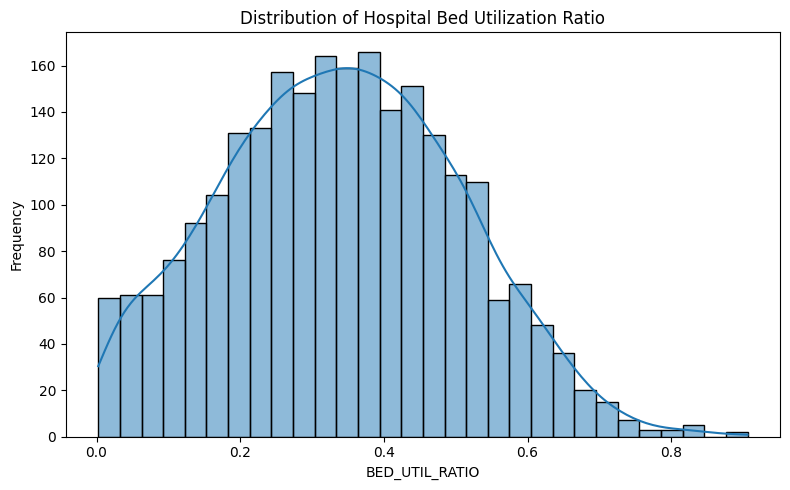

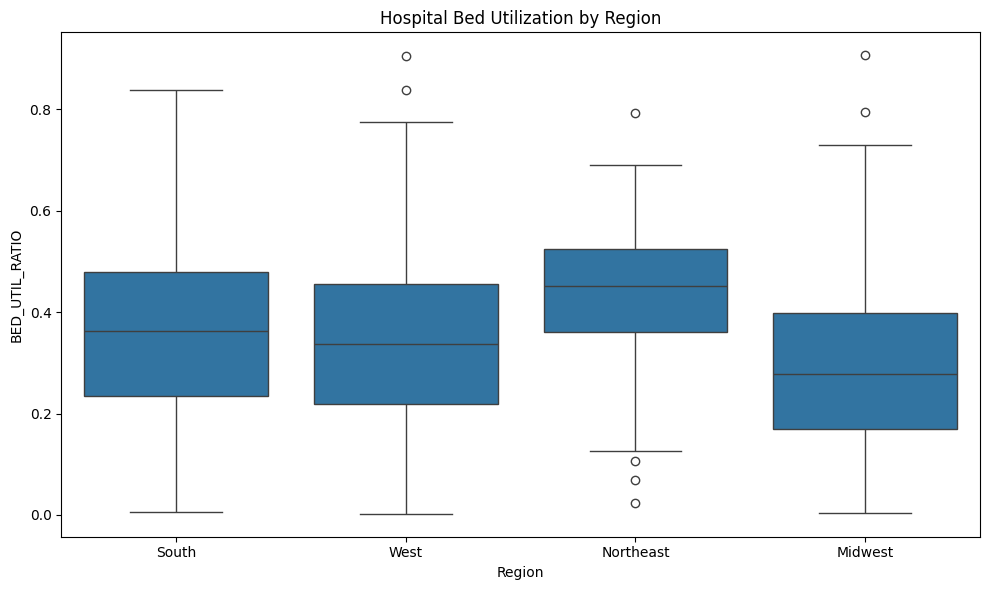

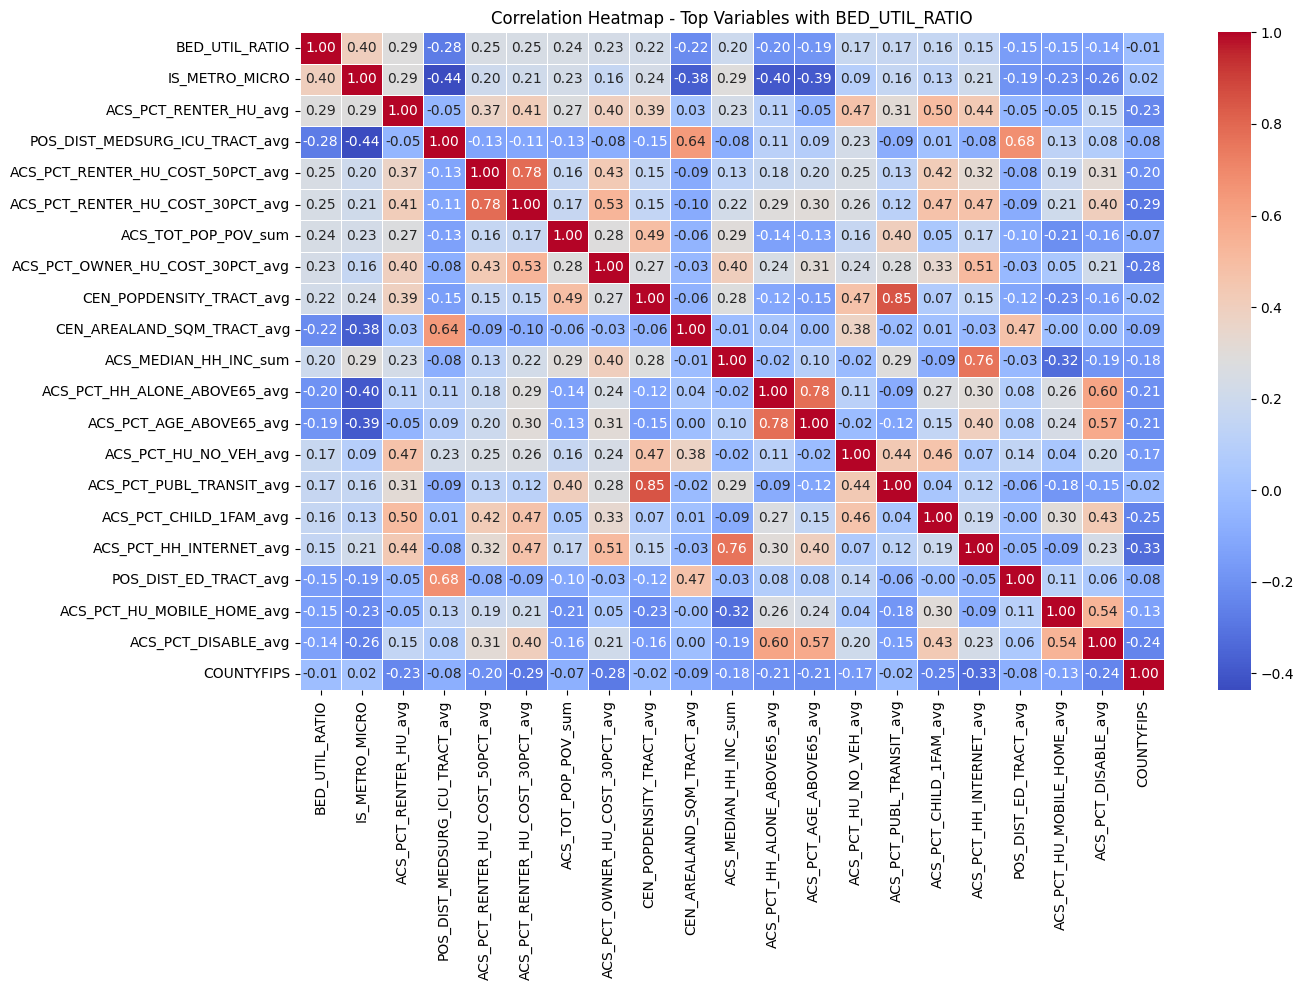

In [13]:
# Histogram of BED_UTIL_RATIO
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['BED_UTIL_RATIO'], kde=True, bins=30)
plt.title("Distribution of Hospital Bed Utilization Ratio")
plt.xlabel("BED_UTIL_RATIO")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# ---------

# Boxplot by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x="REGION", y="BED_UTIL_RATIO")
plt.title("Hospital Bed Utilization by Region")
plt.xlabel("Region")
plt.ylabel("BED_UTIL_RATIO")
plt.tight_layout()
plt.show()
# ---------

# Correlation Matrix Table
corr_matrix = df_selected.corr(numeric_only=True)
top_corr_vars = corr_matrix['BED_UTIL_RATIO'].abs().sort_values(ascending=False).index
# ---------

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_selected[top_corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5,
    annot_kws={"size": 10})
plt.title("Correlation Heatmap - Top Variables with BED_UTIL_RATIO")
plt.tight_layout()
plt.show()

In [14]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px


# Ensure FIPS is string and padded to 5 digits
df['COUNTYFIPS'] = df['COUNTYFIPS'].astype(str).str.zfill(5)

# Filter only necessary columns
map_df = df[['COUNTYFIPS', 'BED_UTIL_RATIO']].dropna()

# Load GeoJSON for US counties (you can download from https://eric.clst.org/tech/usgeojson/)
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

# Plotly Choropleth
fig = px.choropleth(
    map_df,
    geojson=geojson_url,
    locations='COUNTYFIPS',
    color='BED_UTIL_RATIO',
    color_continuous_scale="YlOrRd",
    scope="usa",
    labels={'BED_UTIL_RATIO': 'Hospital Bed Utilization'},
    title="County-Level Hospital Bed Utilization (%)"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()
